In [17]:
import torch
from torch.nn import Module
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [18]:
file = 'Preprocessed data/processed_results.csv'
my_df = pd.read_csv(file)


In [22]:

file = 'Preprocessed data/processed_results.csv'
my_df = pd.read_csv(file)
# 2. جدا کردن ویژگی‌ها
features = my_df[['Max','Min','Max time','Min time','Period']].values  # جایگزین با نام ویژگی‌های خود

# 3. تبدیل به Tensor
input_data = torch.tensor(features, dtype=torch.float32)

# 4. لود مدل
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(41)
model = Model()

file = 'Preprocessed data/processed_results.csv'
my_df = pd.read_csv(file)
model = SimpleANN(input_size=5, hidden_size=2, output_size=2)
model.load_state_dict(torch.load('/home/ali/Transfered/New folder/E/python pro/Training dataset.path'))
model = model.to(device)
input_data = input_data.to(device)
model.eval()

# 5. پیش‌بینی
with torch.no_grad():
    predictions = model(input_data)

# 6. پردازش نتایج
predicted_classes = torch.argmax(predictions, dim=1)

# 7. نمایش نتایج
print(f'Predicted classes: {predicted_classes}')

NameError: name 'SimpleANN' is not defined

In [13]:
print(my_df)

           Max       Min  Max time  Min time    Period  Output
0     0.712821  0.000000  0.724138  0.275862  0.714286       1
1     0.102564  0.047368  0.448276  0.310345  0.714286       1
2     0.082051  0.052632  0.379310  0.551724  0.214286       0
3     0.082051  0.052632  0.310345  0.172414  0.214286       0
4     0.774359  0.052632  0.517241  0.448276  0.321429       1
...        ...       ...       ...       ...       ...     ...
3731  0.943590  1.000000  0.448276  0.482759  0.607143       1
3732  0.964103  1.000000  0.379310  0.000000  0.678571       1
3733  0.307692  1.000000  0.586207  0.000000  0.750000       1
3734  0.307692  1.000000  0.379310  0.137931  0.821429       1
3735  0.964103  1.000000  0.206897  0.275862  1.000000       1

[3736 rows x 6 columns]


In [4]:
#create a model class that inherits nn.modules
class Model(nn.Module):
    #Input features(The number of object's feature)
    #First hidden layer(The number of neurons in first layer)
    #Second hidden layer(The number of neurons in second layer)
    #Output(The number of classes in which depends on objects)
    def __init__(self, in_features = 5, hidden1 = 12, hidden2 = 12, out_features = 2):
        #To instantiate our nn.Module
        super().__init__()
        #To conect all neurons with eachother
        self.fc1 = nn.Linear(in_features,hidden1)
        self.fc2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        #A function which moves everthing forward
    def forward(self,x):
        #relu:>Rectified linear unit:>It is defined as h = max(0, a) where a is any real number.
        #If a is less than or equal to 0, the function returns 0, otherwise, it returns a
        #This function moves data from input to first hidden layer and then second and then output
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x) 
        return x

In [6]:
#Pick a manual seed for randomization
#Random number seeking
torch.manual_seed(41)
model = Model()

file = 'Preprocessed data/processed_results.csv'
my_df = pd.read_csv(file)

In [16]:
print(my_df)

           Max       Min  Max time  Min time    Period  Output
0     0.712821  0.000000  0.724138  0.275862  0.714286       1
1     0.102564  0.047368  0.448276  0.310345  0.714286       1
2     0.082051  0.052632  0.379310  0.551724  0.214286       0
3     0.082051  0.052632  0.310345  0.172414  0.214286       0
4     0.774359  0.052632  0.517241  0.448276  0.321429       1
...        ...       ...       ...       ...       ...     ...
3731  0.943590  1.000000  0.448276  0.482759  0.607143       1
3732  0.964103  1.000000  0.379310  0.000000  0.678571       1
3733  0.307692  1.000000  0.586207  0.000000  0.750000       1
3734  0.307692  1.000000  0.379310  0.137931  0.821429       1
3735  0.964103  1.000000  0.206897  0.275862  1.000000       1

[3736 rows x 6 columns]


In [17]:
model

Model(
  (fc1): Linear(in_features=5, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=2, bias=True)
)

In [7]:
#Train Test Split. set x,y
x = my_df.drop('Output',axis=1)
y = my_df['Output']
#Convert these numpy arrays
x = x.values
y = y.values

#Running train test split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state = 45)# 70% is train and 30% is test

#Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

#Convert y features to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Set criterion of model to measure the error, how far off the predictions are from data
criterion = nn.CrossEntropyLoss()

#Choose an Adam optimizer , learning rate = if the error doesn't go down after a bunch of iterations(epochs), learning rate will decrease
optimizer = torch.optim.Adam(model.parameters(),lr=0.008)


In [8]:
#Train our model
#Epoch:> one run through all the training data in network
epochs = 1900
losses = []
for i in range(epochs):

    #Go through and make a prediction
    y_pred = model.forward(x_train) #Getting the predicted results

    #Measuring the loss which will be high at first
    loss = criterion(y_pred,y_train) #Predicted values vs y_train
    losses.append(loss.detach().numpy())

    #Print every 10 epoch
    if i % 10 == 0:
        print(f"'Epoch: {i} and loss: {loss}")
    #Do back propqgation:> take the error rate of forward propagation and feed it back though the network to fine tune weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

'Epoch: 0 and loss: 0.679471492767334
'Epoch: 10 and loss: 0.5508705973625183
'Epoch: 20 and loss: 0.5469937920570374
'Epoch: 30 and loss: 0.5356442928314209
'Epoch: 40 and loss: 0.5253519415855408
'Epoch: 50 and loss: 0.5152255892753601
'Epoch: 60 and loss: 0.5067404508590698
'Epoch: 70 and loss: 0.5009241104125977
'Epoch: 80 and loss: 0.49531427025794983
'Epoch: 90 and loss: 0.48888012766838074
'Epoch: 100 and loss: 0.47853171825408936
'Epoch: 110 and loss: 0.46616098284721375
'Epoch: 120 and loss: 0.4500686228275299
'Epoch: 130 and loss: 0.428916335105896
'Epoch: 140 and loss: 0.4008401036262512
'Epoch: 150 and loss: 0.36192357540130615
'Epoch: 160 and loss: 0.319029837846756
'Epoch: 170 and loss: 0.28375422954559326
'Epoch: 180 and loss: 0.2556152641773224
'Epoch: 190 and loss: 0.23555395007133484
'Epoch: 200 and loss: 0.22219707071781158
'Epoch: 210 and loss: 0.214393749833107
'Epoch: 220 and loss: 0.20919010043144226
'Epoch: 230 and loss: 0.20602947473526
'Epoch: 240 and loss: 0.

Text(0.5, 0, 'epoch')

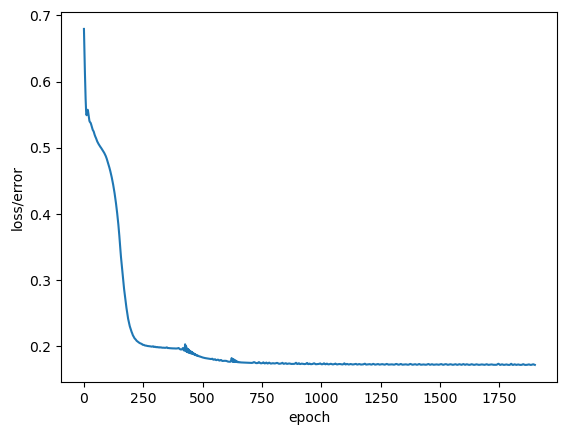

In [9]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [10]:
#Evaluate model on test dataset(test validation)
with torch.no_grad(): #Basically turn off back propogation
    y_eval = model.forward(x_test) #x_test are features form test set and, y_eval will be our predictions
    loss = criterion(y_eval,y_test) #Find the loss or error

In [11]:
loss

tensor(0.2255)

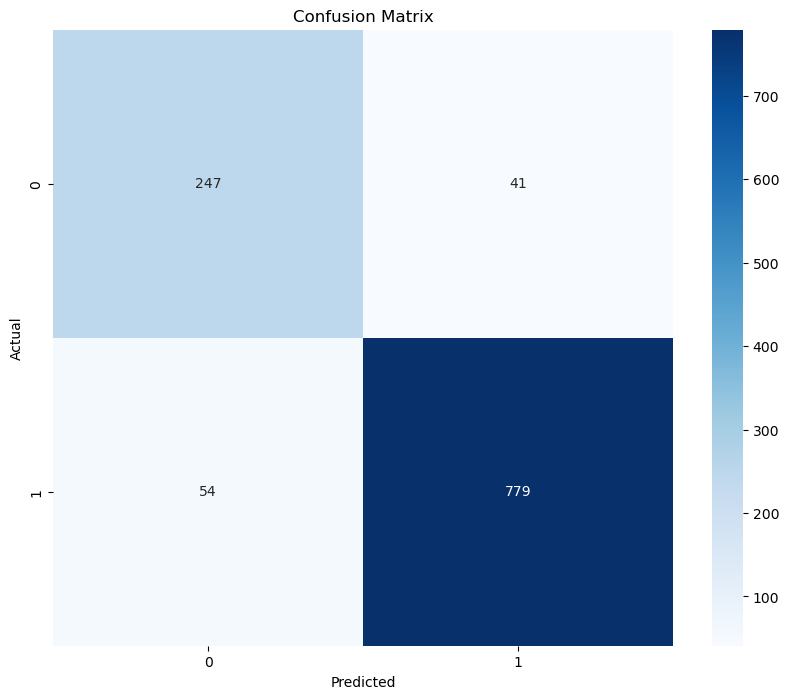

In [12]:
#This will tell us the nomber of correct predictions for test set.
True_One = 0
False_True = 0
False_Zero = 0
True_False = 0

with torch.no_grad():
    y_pred = model(x_test)
    predicted_classes = y_pred.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_classes)
        #print(f'{i+1}.)   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #    if predicted_class == 1 and  true_class == 1:
           # True_One += 1

     #   elif predicted_class == 0 and true_class == 0:
          #  False_Zero += 1

      #  elif predicted_class ==1 and true_class == 0:
         #   False_True += 1

       # else:
        #    True_False += 1
'''        precision = True_One / (True_One + False_True)
        recall = True_One / (True_One + True_False)
        F1_score = (2 * precision * recall) / (precision + recall)
        
print(f'True:> {True_One}')
print(f'False:> {False_Zero}')
print(f'False_Pos:> {False_True}')
print(f'False_Neg:> {True_False}')
print(f'Precision:> {precision}')
print(f'Recall:> {recall}')
print(f'F1-score:> {F1_score}')'''
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


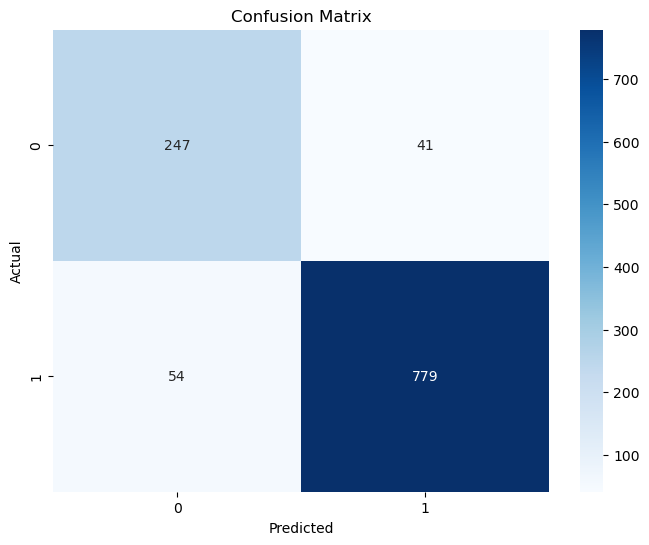

In [128]:
import torch
from torch.nn import Module
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# ... (rest of your code)

# ... (your model training and evaluation code)

# Calculate the confusion matrix
with torch.no_grad():
    y_pred = model(x_test)
    predicted_classes = y_pred.argmax(dim=1)
    cm = confusion_matrix(y_test, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Save
torch.save(model.state_dict(), '/home/ali/Transfered/New folder/E/python pro/Training dataset.path')

# Load
model.load_state_dict(torch.load('/home/ali/Transfered/New folder/E/python pro/Training dataset.path'))

/tmp/ipykernel_8002/1781538827.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/home/ali/Transfered/New folder/E/python pro/Training da

<All keys matched successfully>

In [129]:
'''
rl = 0.001 , epoch = 1000 , 6 Features
rue:> 735
False:> 132
False_True:> 140
True_False:> 115
-------------------------
rl = 0.001 , epoch = 200
True:> 787
False:> 19
False_True:> 263
True_False:> 51
--------------------------
rl = 0.0001 , epoch = 200
True:> 798  
False:> 18
False_True:> 264
True_False:> 40
--------------------------
rl = 0.00001 , epoch = 200
True:> 799
False:> 18
False_True:> 264
False_False:> 39
--------------------------
rl = 0.00001 , epoch = 500
True:> 809
False:> 16
False_True:> 266
True_False:> 29
--------------------------
rl = 0.00001 , epoch = 1000
True:> 636     #######pre = 78% & rec = 76%######
False:> 104
False_True:> 178
True_False:> 202
--------------------------
rl = 0.0001 , epoch = 1000
True:> 816
False:> 24
False_True:> 258
True_False:> 22
-------------------------
rl = 0.001 , epoch = 1000
True:> 729    #######pre = 80% & rec = 86%#######
False:> 109
False_True:> 173
True_False:> 109
-------------------------
rl = 0.001 , epoch = 1000 , seed = 10
True:> 754
False:> 80
False_True:> 202
True_False:> 84
------------------------
rl = 0.0001 , epoch = 1000
True:> 773
False:> 22
False_True:> 260
True_False:> 65
'''

'\nrl = 0.001 , epoch = 1000 , 6 Features\nrue:> 735\nFalse:> 132\nFalse_True:> 140\nTrue_False:> 115\n-------------------------\nrl = 0.001 , epoch = 200\nTrue:> 787\nFalse:> 19\nFalse_True:> 263\nTrue_False:> 51\n--------------------------\nrl = 0.0001 , epoch = 200\nTrue:> 798  \nFalse:> 18\nFalse_True:> 264\nTrue_False:> 40\n--------------------------\nrl = 0.00001 , epoch = 200\nTrue:> 799\nFalse:> 18\nFalse_True:> 264\nFalse_False:> 39\n--------------------------\nrl = 0.00001 , epoch = 500\nTrue:> 809\nFalse:> 16\nFalse_True:> 266\nTrue_False:> 29\n--------------------------\nrl = 0.00001 , epoch = 1000\nTrue:> 636     #######pre = 78% & rec = 76%######\nFalse:> 104\nFalse_True:> 178\nTrue_False:> 202\n--------------------------\nrl = 0.0001 , epoch = 1000\nTrue:> 816\nFalse:> 24\nFalse_True:> 258\nTrue_False:> 22\n-------------------------\nrl = 0.001 , epoch = 1000\nTrue:> 729    #######pre = 80% & rec = 86%#######\nFalse:> 109\nFalse_True:> 173\nTrue_False:> 109\n------------

In [130]:
'''
norm = min-max normalization(feature scaling)--epochs = 1000--lr=0.001
True:> 779
False:> 245
False_True:> 38
True_False:> 60     precision = 95% ---- recall = 92% ---- total false = 283 --- total ture = 839 (Test set)
------------------------------------------------------------------------------


'''

'\nnorm = min-max normalization(feature scaling)--epochs = 1000--lr=0.001\nTrue:> 779\nFalse:> 245\nFalse_True:> 38\nTrue_False:> 60     precision = 95% ---- recall = 92% ---- total false = 283 --- total ture = 839 (Test set)\n------------------------------------------------------------------------------\n\n\n'

In [ ]:
"""obstacle_avoidance controller."""


from controller import Robot


# get the time step of the current world.
TIMESTEP = 32
MAX_SPEED = 6.28


def run_robot(robot):

    # Motor instance to drive robot
    left_motor = robot.getDevice('left wheel motor')
    right_motor = robot.getDevice('right wheel motor')
    
    left_motor.setPosition(float('inf'))
    right_motor.setPosition(float('inf'))
    
    left_motor.setVelocity(0.0)
    right_motor.setVelocity(0.0)
    
    # IR sensors to detect obstalces
    list_ps = []
    for ind in [0, 1, 2, 5, 6, 7]:
        sensor_name = 'ps' + str(ind)
        list_ps.append(robot.getDevice(sensor_name))
        list_ps[-1].enable(TIMESTEP)
    
    # Main loop:
    # - perform simulation steps until Webots is stopping the controller
    while robot.step(TIMESTEP) != -1:
    
        left_speed = MAX_SPEED
        right_speed = MAX_SPEED
        
        # Read the sensors:
        for ps in list_ps:
            ps_val = ps.getValue()
            
            # Process sensor data here.
            if ps_val > 100:
                # turn
                left_speed = -MAX_SPEED
   
        # Drive robot
        left_motor.setVelocity(left_speed)
        right_motor.setVelocity(right_speed)


if __name__ == "__main__":
    # create the Robot instance.
    my_robot = Robot()
    run_robot(my_robot)

In [1]:
import torch
import time

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the size of the matrices
matrix_size = 10000

# Generate large random matrices
matrix_a = torch.randn(matrix_size, matrix_size, device=device)
matrix_b = torch.randn(matrix_size, matrix_size, device=device)

# Perform matrix multiplication on the GPU
print("Starting matrix multiplication...")
start_time = time.time()
result = torch.mm(matrix_a, matrix_b)
end_time = time.time()

# Print the result and computation time
print(f"Matrix multiplication completed in {end_time - start_time:.2f} seconds.")

# Optional: Move the result back to CPU (if needed)
result_cpu = result.cpu()


Using device: cuda
Starting matrix multiplication...
Matrix multiplication completed in 0.02 seconds.


/tmp/ipykernel_33127/859847700.py:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n1, x1, use_line_collection=True)
/tmp/ipykernel_33127/859847700.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n2, x2, use_line_collection=True)


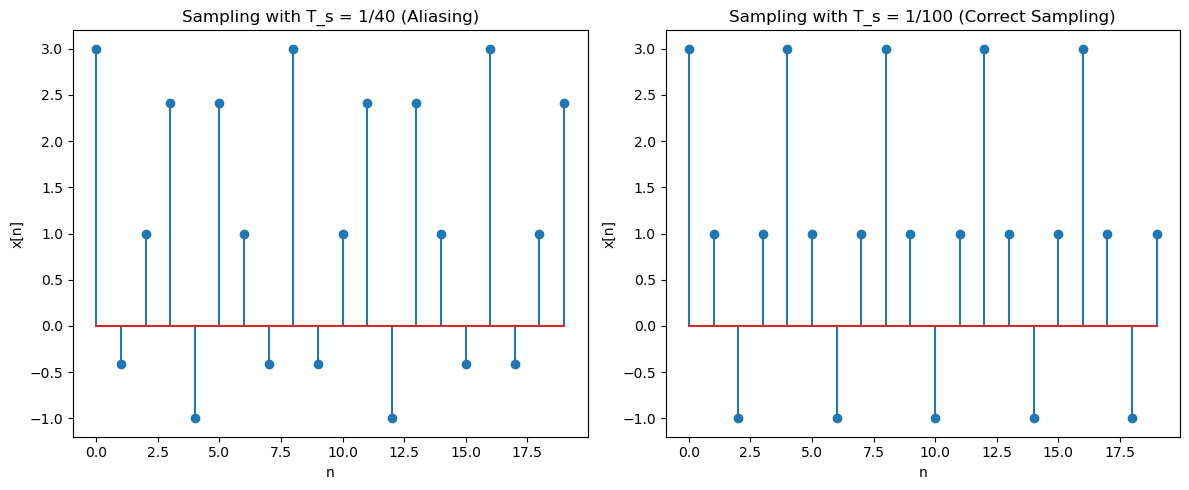

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# زمان‌های نمونه‌برداری
n1 = np.arange(0, 20, 1)
x1 = 1 + 2 * np.cos((5 * np.pi * n1) / 4)

n2 = np.arange(0, 20, 1)
x2 = 1 + 2 * np.cos((np.pi * n2) / 2)

# رسم نمودار
plt.figure(figsize=(12, 5))

# حالت 1 (T_s = 1/40)
plt.subplot(1, 2, 1)
plt.stem(n1, x1, use_line_collection=True)
plt.title('Sampling with T_s = 1/40 (Aliasing)')
plt.xlabel('n')
plt.ylabel('x[n]')

# حالت 2 (T_s = 1/100)
plt.subplot(1, 2, 2)
plt.stem(n2, x2, use_line_collection=True)
plt.title('Sampling with T_s = 1/100 (Correct Sampling)')
plt.xlabel('n')
plt.ylabel('x[n]')

plt.tight_layout()
plt.show()

Solution: {x: 2/7, y: 15/7}


In [ ]:
from docx import Document

# ایجاد سند ورد
doc = Document()
doc.add_heading("معادلات ریاضی تشکیل آرایش در پرواز گروهی کوآدکوپترها", level=1)

# محتوای معادلات
content = """
### 1. مدل سینماتیکی برای کوآدکوپترها:

\\[
\\dot{x}_i = v_i \\cos(\\theta_i), \\quad \\dot{y}_i = v_i \\sin(\\theta_i), \\quad \\dot{\\theta}_i = \\omega_i
\\]

- \\(x_i, y_i\\): مختصات موقعیت کوآدکوپتر \\(i\\)-ام در صفحه دوبعدی.
- \\(\\theta_i\\): زاویه جهت‌گیری کوآدکوپتر \\(i\\).
- \\(v_i\\): سرعت خطی کوآدکوپتر \\(i\\).
- \\(\\omega_i\\): سرعت زاویه‌ای کوآدکوپتر \\(i\\).

### 2. کنترل تشکیل آرایش (لیدر-فالوئر):

\\[
\\dot{x}_i = k_p (x_L - x_i) + v_i \\cos(\\theta_i), \\quad \\dot{y}_i = k_p (y_L - y_i) + v_i \\sin(\\theta_i)
\\]

- \\(x_L, y_L\\): مختصات رهبر.
- \\(k_p\\): ضریب کنترل موقعیت پیرو به رهبر.

### 3. کنترل ساختار مجازی:

\\[
x_i = x_c + d_i \\cos(\\phi_i), \\quad y_i = y_c + d_i \\sin(\\phi_i)
\\]

- \\(x_c, y_c\\): مرکز ساختار مجازی.
- \\(d_i\\): فاصله کوآدکوپتر \\(i\\) از مرکز.
- \\(\\phi_i\\): زاویه نسبی کوآدکوپتر \\(i\\).

### 4. معادلات اجتناب از برخورد:

\\[
U_i = \\sum_{j \\neq i} \\frac{1}{\\| p_i - p_j \\|^2}
\\]

\\[
F_i = -\\nabla U_i = -\\sum_{j \\neq i} \\frac{p_i - p_j}{\\| p_i - p_j \\|^3}
\\]

- \\(p_i = [x_i, y_i]^T\\): موقعیت کوآدکوپتر \\(i\\).
- \\(\\| p_i - p_j \\|\\): فاصله اقلیدسی بین \\(i\\) و \\(j\\).

### 5. کنترل اجماع برای همگام‌سازی سرعت‌ها:

\\[
\\dot{v}_i = \\sum_{j \\in N_i} k_c (v_j - v_i)
\\]

- \\(N_i\\): همسایگان کوآدکوپتر \\(i\\).
- \\(k_c\\): ضریب کنترل اجماع.

### 6. ترکیب معادلات برای کنترل گروهی:

\\[
\\begin{aligned}
&\\dot{x}_i = v_i \\cos(\\theta_i) + F_{ix}, \\\\
&\\dot{y}_i = v_i \\sin(\\theta_i) + F_{iy}, \\\\
&\\dot{v}_i = \\sum_{j \\in N_i} k_c (v_j - v_i), \\\\
&\\dot{\\theta}_i = \\omega_i.
\\end{aligned}
\\]
"""

# افزودن محتوای معادلات به سند
doc.add_paragraph(content)

# ذخیره فایل
file_name = "formation_equations.docx"
doc.save(file_name)
print(f"فایل با موفقیت ایجاد شد: {file_name}")
